In [ ]:
# Uncomment the following lines, run this cell once and restart the runtime
# After restart comment this two lines back and don't run this cell again
# !sudo apt-get install build-essential swig python3-dev
# !pip3 install auto-sklearn

In [ ]:
import autosklearn
autosklearn.__version__ #if it works, it's correct
#autisklearn works not well with image data

'0.14.2'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Upload the kaggle.json file to colab, then run the following cell once
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle --version #if it works, it's correct

Kaggle API 1.5.4


In [ ]:
!kaggle competitions download -c facial-keypoints-detection

SampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)
IdLookupTable.csv: Skipping, found more recently modified local copy (use --force to force download)
training.zip: Skipping, found more recently modified local copy (use --force to force download)
test.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/test.zip 
!unzip /content/training.zip

Archive:  /content/test.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
Archive:  /content/training.zip
replace training.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: training.csv            


In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [ ]:
train = pd.read_csv("training.csv")
print(train.shape)


(7049, 31)


### Check for columns

In [ ]:
train.columns #we see here that last column is image it self

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')

### And checking for missing values in the data

In [ ]:
train.isnull().any().value_counts() #28 out of 31 columns have NA values,

True     28
False     3
dtype: int64

In [ ]:
train.shape

(7049, 31)

In [ ]:
train_na = train.dropna()
train_na.shape 

(2140, 31)

### Only 2140 rows of 7049 are over after dropping na, so need to look for other method, one common method is by filling data by previous values
https://www.geeksforgeeks.org/python-pandas-dataframe-ffill/

In [ ]:
train_fill = train.fillna(method = 'ffill')
train_fill.isnull().any().value_counts() # all full now

False    31
dtype: int64

In [ ]:
train_fill.isnull().sum() #i try it first no train_fill set, next i will make it simple train set

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [ ]:
train = train_fill

### Next i will try to visualise the data

In [ ]:
images = train['Image']
images.head()

0    238 236 237 238 240 240 239 241 241 243 240 23...
1    219 215 204 196 204 211 212 200 180 168 178 19...
2    144 142 159 180 188 188 184 180 167 132 84 59 ...
3    193 192 193 194 194 194 193 192 168 111 50 12 ...
4    147 148 160 196 215 214 216 217 219 220 206 18...
Name: Image, dtype: object

In [ ]:
images.shape

(7049,)

In [ ]:
type(images)

pandas.core.series.Series

In [ ]:
print(len(images[0])) #for some reason the type of one image is one long string that we need yo convert to matrix of 96*96
print(type(images[0]))

33593
<class 'str'>


In [ ]:
mapped_images = []
for i in range(images.shape[0]):
  img = images[i].split(' ')
  mapped_images.append(img)
images_np  = np.array(mapped_images,dtype = 'float')

In [ ]:
X_train = images_np.reshape(-1,96,96)
X_train.shape

(7049, 96, 96)

In [ ]:
y_train = train.drop('Image',axis = 1)
y_train.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


### The images are 96x96 pixels, need to reshape for visualisation

<Figure size 432x288 with 0 Axes>

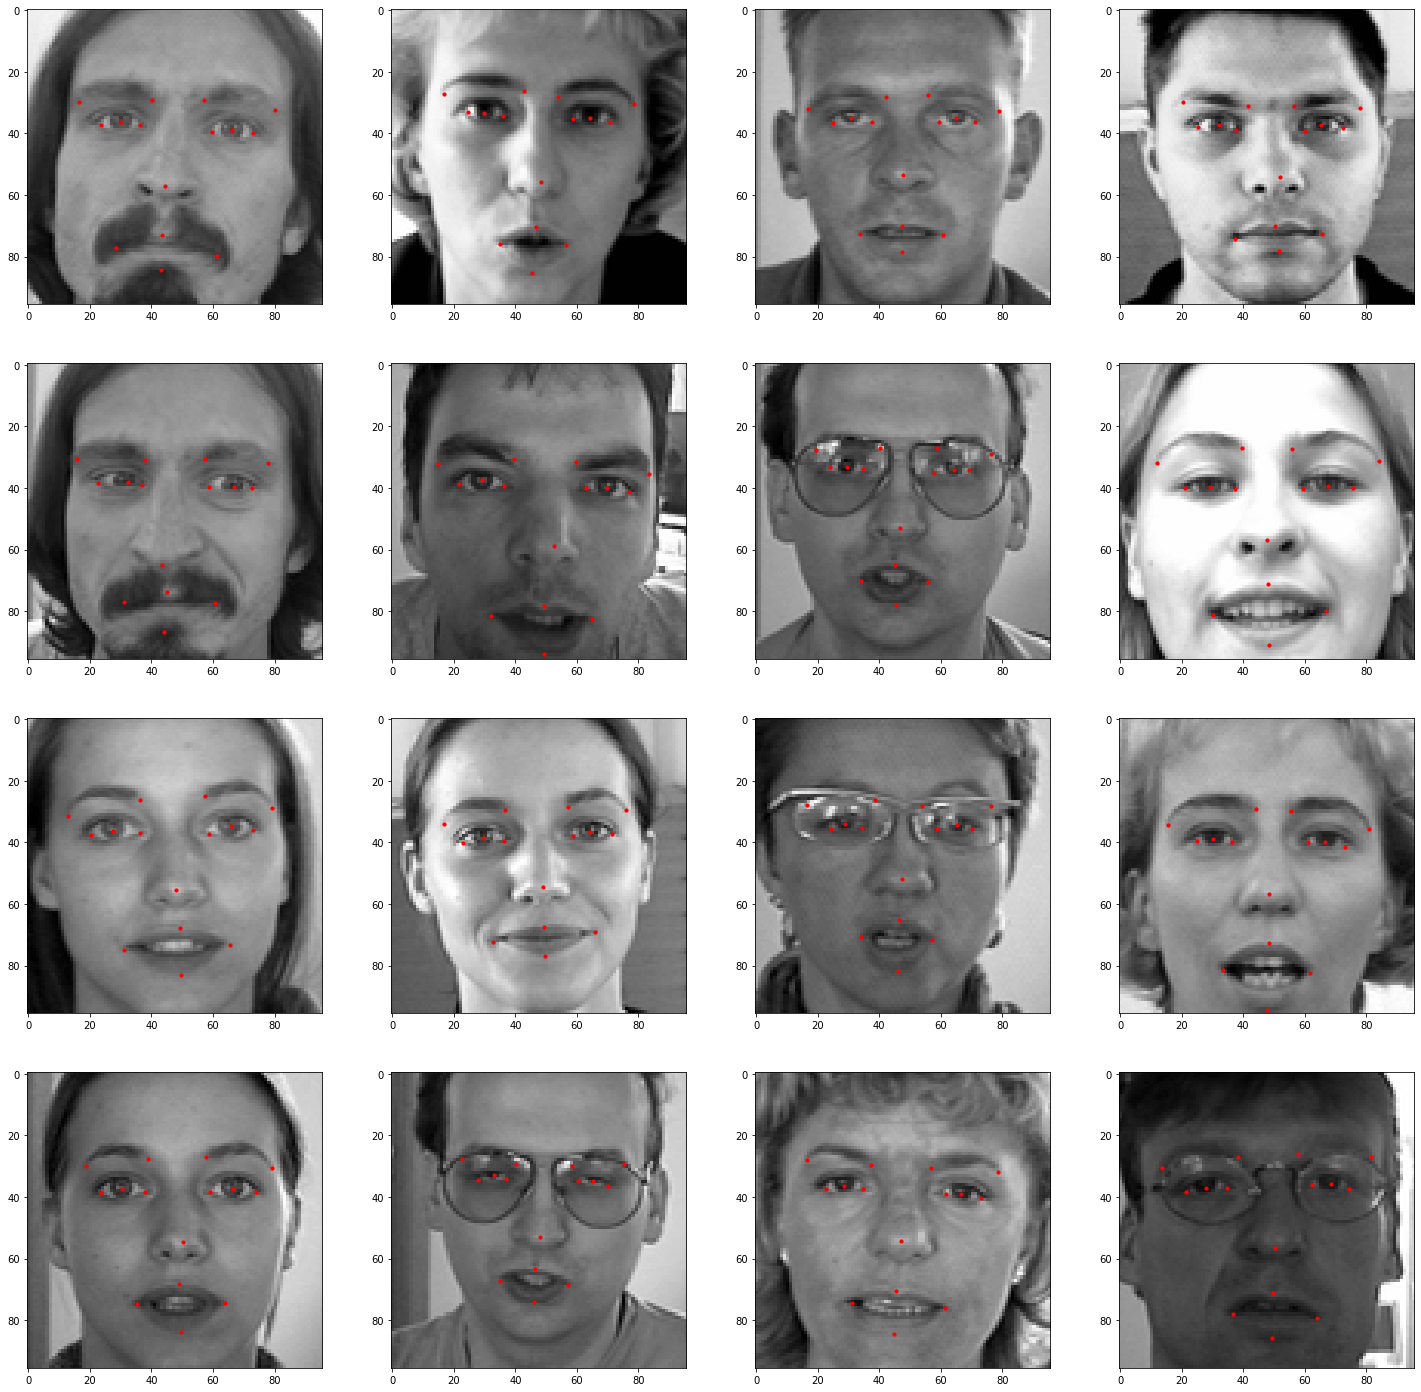

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure();
nrows,ncols = 4,4
plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 25));
face_points = y_train.iloc[0].values
for i in range(16):  # show first 12 faces
    plt.subplot(nrows,ncols,i+1);  # i+1 is position of subplot in 3 x 4 table
    face_points = y_train.iloc[i].values
    plt.scatter(face_points[::2], face_points[1::2], c='red', s=10) #and points
    # show bitmap, interpret 0 as white and 255 as black (grayvalues)
    plt.imshow(X_train[i], cmap=plt.cm.gray);

### Need to make up a label data next



In [ ]:
y_train = train.drop('Image',axis = 1)

In [ ]:
print(f"shape of X_train: {X_train.shape}")
print(f"shape of y_train: {y_train.shape}")

shape of X_train: (7049, 96, 96)
shape of y_train: (7049, 30)


### Think X_train need to be reshaped to (7049, 96, 96, 1) for CNN because methods of CNN only takes 4D tensers

In [ ]:
X_train = X_train.reshape(7049,96,96,1)
print(f"shape of X_train: {X_train.shape}")
print(f"shape of y_train: {y_train.shape}")

shape of X_train: (7049, 96, 96, 1)
shape of y_train: (7049, 30)


In [ ]:
X_train[0]

### Split into train and validation sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
print(f"shape of X_train: {X_train.shape}")
print(f"shape of y_train: {y_train.shape}")
print(f"shape of X_val: {X_val.shape}")
print(f"shape of y_val: {y_val.shape}")

shape of X_train: (5639, 96, 96, 1)
shape of y_train: (5639, 30)
shape of X_val: (1410, 96, 96, 1)
shape of y_val: (1410, 30)


### Build model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, BatchNormalization

In [ ]:
def init_model():
  model = tf.keras.Sequential()
  model.add(Conv2D(filters=32, kernel_size=(3, 3), 
                     activation='relu', 
                     strides=(1,1),  
                     padding='same',
                     input_shape=(96, 96, 1)))
  model.add(BatchNormalization()) #https://www.youtube.com/watch?v=dXB-KQYkzNU&t=67s
   
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                     activation='relu', 
                     strides=(1,1),  
                     padding='same',))
  model.add(BatchNormalization())
  
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(filters=128, kernel_size=(3, 3), 
                     activation='relu', 
                     strides=(1,1),  
                     padding='same'))
  model.add(BatchNormalization())
  
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())

  model.add(Dense(units=128, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(units=30))


  model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
  
  return model
   



In [ ]:
model = init_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 96, 96, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                        

### Catch into history

In [ ]:
y_train.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
315,68.708791,40.356449,27.640813,41.962267,60.896856,41.041283,77.197861,41.503316,35.441455,42.191743,19.840684,43.568599,58.384428,25.902545,83.162695,29.343658,36.588834,28.196791,10.663187,34.391102,52.190118,59.398845,68.479316,80.736000,32.229818,83.030246,51.960642,74.541176,52.419594,88.307166
4561,69.587125,38.212292,30.066466,34.482861,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,22.056816,40.330122,53.299787,29.987657,80.947787,27.977535,38.779298,33.302596,14.798890,35.982760,49.832132,63.944922,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,48.340292,72.522466
5007,63.575314,36.237629,28.981812,39.963096,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,22.056816,40.330122,53.299787,29.987657,80.947787,27.977535,38.779298,33.302596,14.798890,35.982760,47.076833,60.186984,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,48.141257,71.895556
1161,65.022000,36.204060,31.236000,39.153660,58.854600,37.812960,71.725800,36.740400,38.207400,39.689940,25.068600,40.762800,57.653400,28.539720,76.015800,28.964160,39.012000,30.304920,18.096600,35.131500,51.991200,54.782400,67.167000,67.845000,35.794200,71.062800,51.882600,67.041000,51.882600,75.353400
2275,64.644616,34.280084,28.284307,38.586911,57.756510,36.588318,73.673751,33.584799,36.334975,39.375088,19.740464,40.573118,54.688730,29.698763,80.545129,26.951081,38.343541,32.270313,12.839409,34.806635,54.072987,60.539258,67.582186,76.578265,37.394302,80.810970,52.719413,79.736604,53.754499,80.161255


In [ ]:
history=model.fit(X_train, y_train, epochs=15,batch_size=128, validation_data=(X_val, y_val), verbose=1)

Epoch 1/15
45/45 [==============================] - 136s 3s/step - loss: 295.8961 - accuracy: 0.2107 - val_loss: 187.6796 - val_accuracy: 0.6177
Epoch 2/15
45/45 [==============================] - 135s 3s/step - loss: 79.9165 - accuracy: 0.3032 - val_loss: 252.1428 - val_accuracy: 0.6057
Epoch 3/15
45/45 [==============================] - 139s 3s/step - loss: 61.5963 - accuracy: 0.3251 - val_loss: 248.1145 - val_accuracy: 0.6319
Epoch 4/15
45/45 [==============================] - 135s 3s/step - loss: 52.4284 - accuracy: 0.3678 - val_loss: 17.8364 - val_accuracy: 0.7184
Epoch 5/15
45/45 [==============================] - 135s 3s/step - loss: 45.4793 - accuracy: 0.3854 - val_loss: 17.6822 - val_accuracy: 0.7177
Epoch 6/15
45/45 [==============================] - 136s 3s/step - loss: 42.6290 - accuracy: 0.4194 - val_loss: 30.5127 - val_accuracy: 0.7390
Epoch 7/15
45/45 [==============================] - 136s 3s/step - loss: 39.0532 - accuracy: 0.4279 - val_loss: 12.1815 - val_accuracy: 0.

### Evaluate model

In [ ]:
# helper functions for visualisation
# plotting the loss functions used in this notebook
# we plot the loss we want to optimise on the left (in this case: accuracy)
def plot_history(history):
    plt.figure(figsize = (12,4))
    plt.subplot(1,2,1)

    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(history.epoch, np.array(history.history['accuracy']),'g-',
           label='Train accuracy')
    plt.plot(history.epoch, np.array(history.history['val_accuracy']),'r-',
           label = 'Validation accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Loss minimised by model')
    plt.plot(history.epoch, np.array(history.history['loss']),'g-',
           label='Train loss')
    plt.plot(history.epoch, np.array(history.history['val_loss']),'r-',
           label = 'Validation loss')
    plt.legend()

Training set Accuracy:   0.79
Training set Loss: 9.1622

Validation set Accuracy:   0.77
Validation set Loss:10.2659



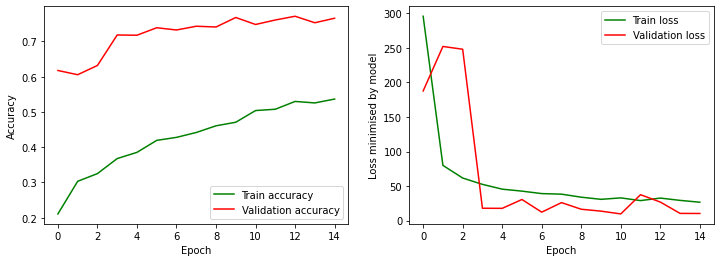

In [ ]:
[train_loss, train_accuracy] = model.evaluate(X_train, y_train, verbose=0)
print("Training set Accuracy:{:7.2f}".format(train_accuracy))
print("Training set Loss:{:7.4f}\n".format(train_loss))

[val_loss, val_accuracy] = model.evaluate(X_val, y_val, verbose=0)
print("Validation set Accuracy:{:7.2f}".format(val_accuracy))
print("Validation set Loss:{:7.4f}\n".format(val_loss))

#Now we visualise what happened during training
plot_history(history)

### Prepare test set

In [ ]:
test = pd.read_csv("test.csv")
print(test.shape)

(1783, 2)


In [ ]:
images_test = test['Image']
type(images_test)

pandas.core.series.Series

In [ ]:
images_test.shape

(1783,)

In [ ]:
mapped_images_test = []
for i in range(images_test.shape[0]):
  img = images_test[i].split(' ')
  mapped_images_test.append(img)
X_test  = np.array(mapped_images_test,dtype = 'float')

In [ ]:
X_test = X_test.reshape(-1,96,96)

In [ ]:
X_test.shape

(1783, 96, 96)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions.shape

(1783, 30)

In [ ]:
predictions[0]

array([63.169342, 35.198704, 26.549002, 33.465107, 55.165115, 35.977047,
       67.3149  , 35.6987  , 34.518387, 34.832127, 19.879768, 33.304153,
       54.29824 , 24.638758, 74.33079 , 25.46083 , 36.600037, 25.024216,
       14.343162, 25.372492, 45.862446, 46.54895 , 58.781708, 70.76837 ,
       30.524584, 69.95542 , 43.313   , 65.92979 , 45.48821 , 79.29773 ],
      dtype=float32)

### From predicted numpy array ro pd frame

In [ ]:
predicted_data = pd.DataFrame(data=predictions, columns=[y_train.columns])

In [ ]:
predicted_data.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,63.169342,35.198704,26.549002,33.465107,55.165115,35.977047,67.314903,35.698700,34.518387,34.832127,19.879768,33.304153,54.298241,24.638758,74.330788,25.460831,36.600037,25.024216,14.343162,25.372492,45.862446,46.548950,58.781708,70.768372,30.524584,69.955421,43.313000,65.929787,45.488209,79.297729
1,65.295982,36.575184,27.534023,36.912521,57.533485,36.200008,70.369560,35.337349,34.091846,37.517803,20.575106,36.538673,54.801983,29.513151,76.835358,26.893831,36.663692,29.478764,13.523492,29.986607,47.483574,55.659008,62.868584,73.224022,30.924644,73.334000,46.373013,70.690407,47.864517,80.295097
2,62.646999,34.675289,28.541342,35.074337,56.375626,35.867840,67.291412,34.282238,34.172894,36.990765,21.014021,34.415676,53.684631,27.207136,72.379356,26.002419,36.490166,28.558159,15.447613,29.346018,47.062672,52.998421,60.330570,71.186722,31.528034,71.460754,45.786713,67.662849,48.111378,78.513565
3,66.485023,39.151936,29.951618,38.186470,58.726158,39.368084,74.464134,38.183430,37.077839,40.464287,22.529768,40.855293,56.015610,28.789724,81.270615,29.546274,38.584076,32.493874,15.367238,34.998920,47.491203,61.555008,71.834213,74.645821,34.590557,79.063416,51.286884,74.935150,49.491203,82.540131
4,67.708580,37.300034,29.572479,38.812874,59.156612,38.383541,72.470642,37.181885,34.686005,38.361816,21.712013,38.887257,56.904789,28.281582,81.144302,28.859425,39.479839,29.442965,14.130485,32.414818,48.607758,56.308796,66.328148,75.886780,33.603222,76.436172,48.891872,71.668999,48.429382,83.351151


<Figure size 432x288 with 0 Axes>

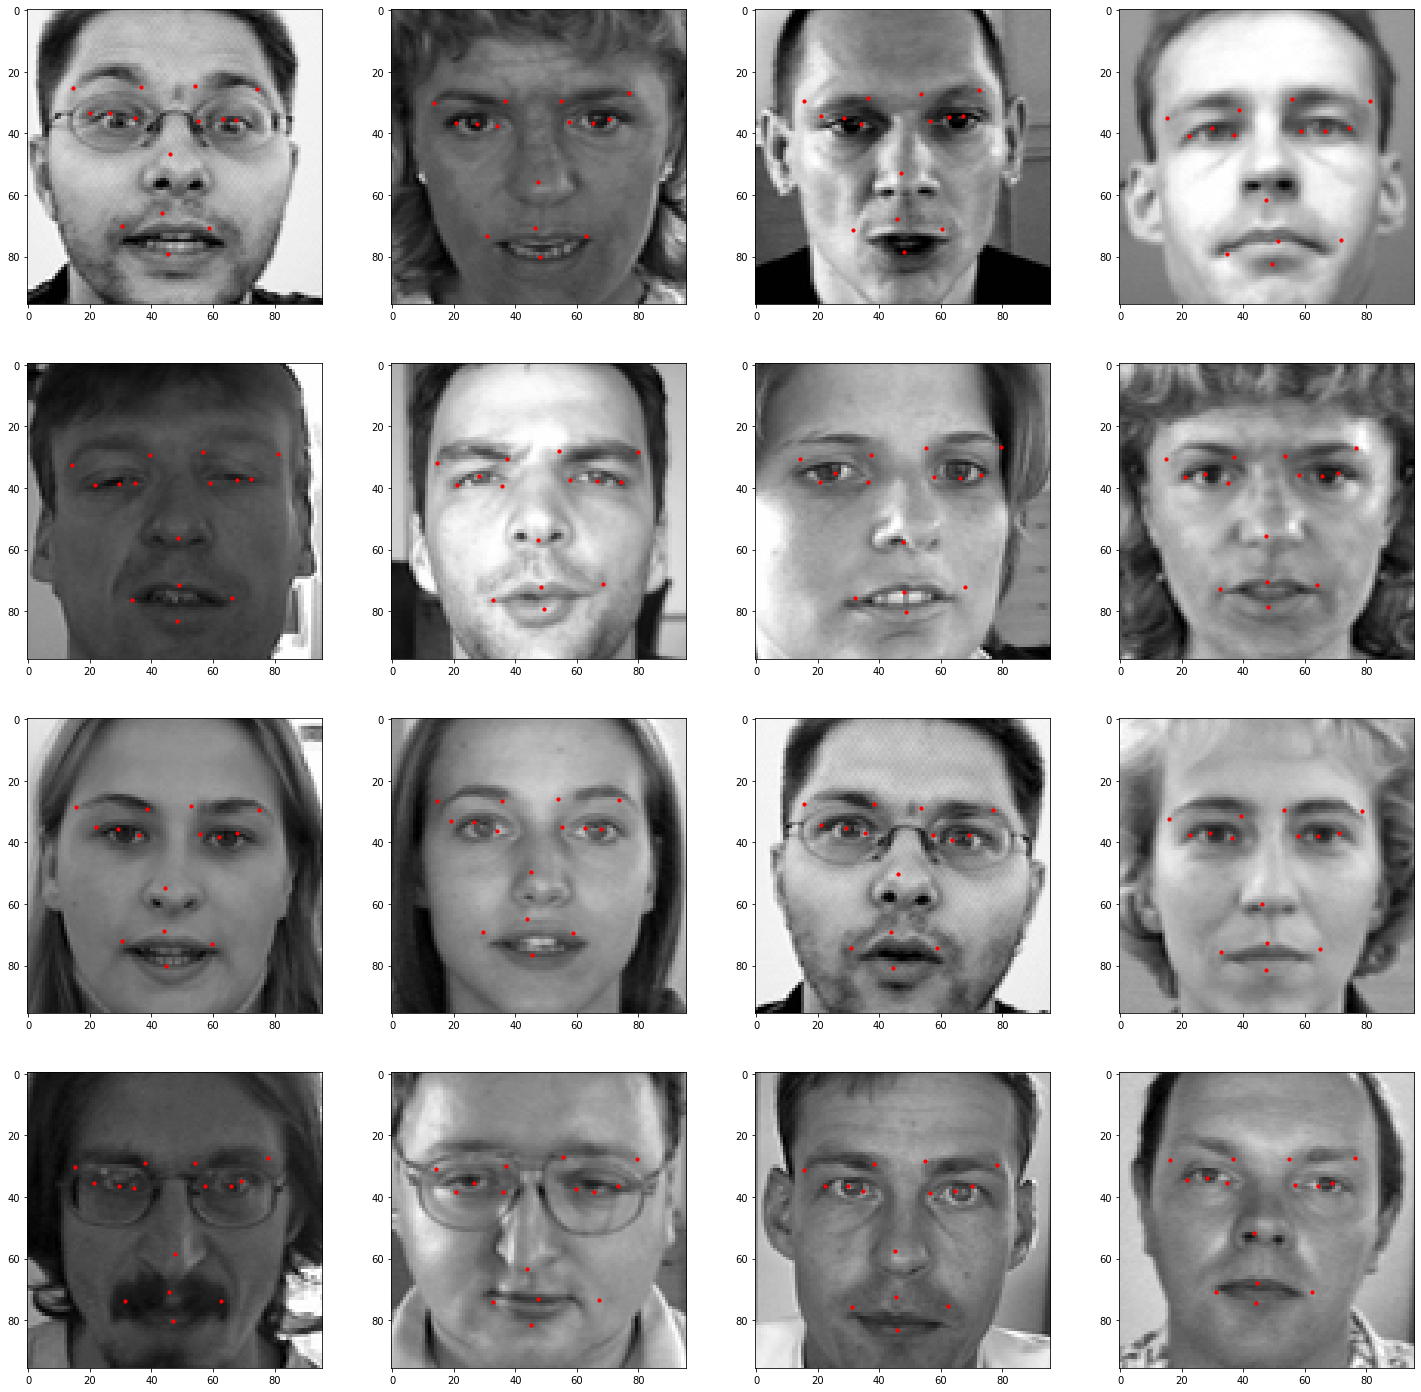

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure();
nrows,ncols = 4,4
plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 25));
face_points_test = predicted_data.iloc[0].values
for i in range(16):  # show first 12 faces
    plt.subplot(nrows,ncols,i+1);  # i+1 is position of subplot in 3 x 4 table
    face_points_test = predicted_data.iloc[i].values
    plt.scatter(face_points_test[::2], face_points_test[1::2], c='red', s=10) #and points
    # show bitmap, interpret 0 as white and 255 as black (grayvalues)
    plt.imshow(X_test[i], cmap=plt.cm.gray);

In [ ]:
https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/save_and_load.ipynb #for model saving